# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2

In [2]:
labels = os.listdir("C:\\Users\\hp\\Desktop\\Driver Drowsiness Detection System\\Drowsiness Detection aa\\Dataset\\train")

In [3]:
labels

['Closed', 'no_yawn', 'Open', 'yawn']

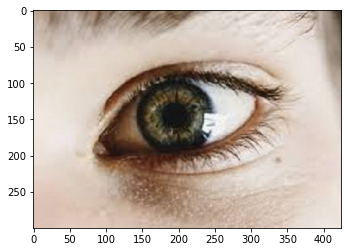

In [5]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("C:\\Users\\hp\\Desktop\\Driver Drowsiness Detection System\\Drowsiness Detection aa\\Dataset\\train\\Open\\_57.jpg"))

In [6]:
a = plt.imread("C:\\Users\\hp\\Desktop\\Driver Drowsiness Detection System\\Drowsiness Detection aa\\Dataset\\train\\Open\\_57.jpg")

In [7]:
a

array([[[186, 164, 150],
        [184, 165, 150],
        [185, 166, 151],
        ...,
        [ 70,  54,  39],
        [ 67,  51,  36],
        [ 66,  50,  35]],

       [[185, 163, 149],
        [183, 164, 149],
        [185, 166, 151],
        ...,
        [ 69,  53,  38],
        [ 67,  51,  36],
        [ 66,  50,  35]],

       [[181, 162, 147],
        [182, 163, 148],
        [185, 166, 151],
        ...,
        [ 69,  53,  38],
        [ 67,  51,  36],
        [ 65,  49,  34]],

       ...,

       [[216, 193, 179],
        [217, 194, 180],
        [219, 196, 182],
        ...,
        [238, 229, 224],
        [238, 229, 224],
        [238, 229, 224]],

       [[216, 193, 179],
        [217, 194, 180],
        [219, 196, 182],
        ...,
        [238, 229, 224],
        [238, 229, 224],
        [238, 229, 224]],

       [[216, 193, 179],
        [217, 194, 180],
        [219, 196, 182],
        ...,
        [238, 229, 224],
        [238, 229, 224],
        [238, 229, 224]]

In [8]:
a.shape

(300, 425, 3)

In [9]:
a.dtype

dtype('uint8')

In [10]:
a.size

382500

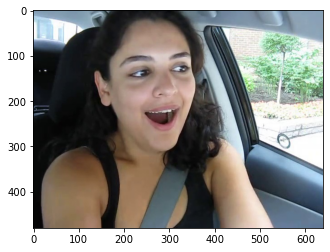

In [11]:
plt.imshow(plt.imread("C:\\Users\\hp\\Desktop\\Driver Drowsiness Detection System\\Drowsiness Detection aa\\Dataset\\train\\yawn\\53.jpg"))

# For Yawn Data : Capturing Face from the Image using Classifier and Cropping the Image and Converting the Image into the Image Array 

In [13]:
def face_for_yawn(direc="C:\\Users\\hp\\Desktop\\Driver Drowsiness Detection System\\Drowsiness Detection aa\\Dataset\\train", 
                    face_cas_path="C:\\Users\\hp\\Desktop\\Driver Drowsiness Detection System\\Drowsiness Detection aa\\haar cascade files\\haarcascade_frontalface_alt.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no

In [14]:
yawn_no_yawn = face_for_yawn()

0
1


In [15]:
yawn_no_yawn

[[array([[[  0, 255,   0],
          [  0, 255,   0],
          [  0, 255,   0],
          ...,
          [  0, 255,   0],
          [  0, 255,   0],
          [  0, 255,   0]],
  
         [[  0, 255,   0],
          [ 15, 239,  16],
          [ 41, 210,  44],
          ...,
          [ 29, 198,  34],
          [ 20, 189,  24],
          [  2, 247,   2]],
  
         [[  0, 255,   0],
          [ 42, 210,  44],
          [118, 126, 126],
          ...,
          [ 79,  91,  93],
          [ 52,  62,  63],
          [  4, 231,   6]],
  
         ...,
  
         [[  0, 255,   0],
          [  7, 166,  21],
          [ 18,   1,  57],
          ...,
          [ 77,  25, 162],
          [ 75,  25, 156],
          [  9, 228,  18]],
  
         [[  0, 255,   0],
          [  7, 167,  21],
          [ 18,   2,  57],
          ...,
          [ 68,  24, 154],
          [ 71,  26, 156],
          [  8, 228,  18]],
  
         [[  0, 255,   0],
          [  1, 245,   3],
          [  2, 225,   7

In [16]:
len(yawn_no_yawn)

286

In [18]:
def get_data(dir_path="C:\\Users\\hp\\Desktop\\Driver Drowsiness Detection System\\Drowsiness Detection aa\\Dataset\\train", 
                face_cas="C:\\Users\\hp\\Desktop\\Driver Drowsiness Detection System\\Drowsiness Detection aa\\haar cascade files\\haarcascade_frontalface_alt.xml", 
                eye_cas="C:\\Users\\hp\\Desktop\\Driver Drowsiness Detection System\\Drowsiness Detection aa\\haar cascade files\\haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num += 2
        print(class_num)
        for img in os.listdir(path): 
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [19]:
data_train = get_data()

2
3


In [20]:
data_train

[[array([[[ 77,  77,  93],
          [ 75,  75,  91],
          [ 72,  72,  88],
          ...,
          [140, 123, 136],
          [134, 117, 130],
          [133, 119, 131]],
  
         [[ 79,  80,  94],
          [ 78,  78,  94],
          [ 75,  75,  91],
          ...,
          [126, 109, 122],
          [125, 108, 121],
          [123, 109, 121]],
  
         [[ 79,  80,  94],
          [ 79,  80,  94],
          [ 77,  77,  93],
          ...,
          [120, 103, 116],
          [116,  99, 112],
          [118, 104, 116]],
  
         ...,
  
         [[ 96,  92, 121],
          [ 96,  92, 121],
          [ 95,  91, 120],
          ...,
          [101, 101, 131],
          [102, 102, 132],
          [101, 101, 131]],
  
         [[ 96,  92, 121],
          [ 96,  92, 121],
          [ 97,  93, 122],
          ...,
          [102, 102, 132],
          [102, 102, 132],
          [ 99,  99, 129]],
  
         [[ 97,  92, 121],
          [ 96,  91, 120],
          [ 98,  93, 122

In [21]:
len(data_train)

1234

In [22]:
def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no) 

In [23]:
new_data = append_data()

0
1
2
3


<ipython-input-22-f1d5c1f345be>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(yaw_no)


In [2]:
new_data = np.load('C://Users//hp//Desktop//Driver Drowsiness Detection System [Driver Alert]//Drowsiness Detection Approaches [ with Source Code ]//Approach B//Numpy Data//when-SF-1_044.npy', allow_pickle=True)

In [3]:
new_data

array([[array([[[  0, 255,   0],
                [  0, 255,   0],
                [  0, 255,   0],
                ...,
                [  0, 255,   0],
                [  0, 255,   0],
                [  0, 255,   0]],

               [[  0, 255,   0],
                [ 60,  66,  65],
                [ 34,  40,  39],
                ...,
                [100, 106, 105],
                [104, 110, 109],
                [ 42, 196,  44]],

               [[  0, 255,   0],
                [ 33,  39,  38],
                [ 17,  23,  22],
                ...,
                [109, 115, 114],
                [110, 116, 115],
                [ 44, 198,  46]],

               ...,

               [[  0, 255,   0],
                [ 96,  75,  54],
                [ 99,  76,  54],
                ...,
                [152, 130, 118],
                [103,  75,  60],
                [ 44, 183,  24]],

               [[  0, 255,   0],
                [ 97,  73,  55],
                [ 99,  75,  5

In [4]:
len(new_data)

2421

In [5]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

In [6]:
len(X)

2421

In [7]:
len(y)

2421

In [8]:
print(type(X),type(y))

<class 'list'> <class 'list'>


In [9]:
X

[array([[[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],
 
        [[  0, 255,   0],
         [ 60,  66,  65],
         [ 34,  40,  39],
         ...,
         [100, 106, 105],
         [104, 110, 109],
         [ 42, 196,  44]],
 
        [[  0, 255,   0],
         [ 33,  39,  38],
         [ 17,  23,  22],
         ...,
         [109, 115, 114],
         [110, 116, 115],
         [ 44, 198,  46]],
 
        ...,
 
        [[  0, 255,   0],
         [ 96,  75,  54],
         [ 99,  76,  54],
         ...,
         [152, 130, 118],
         [103,  75,  60],
         [ 44, 183,  24]],
 
        [[  0, 255,   0],
         [ 97,  73,  55],
         [ 99,  75,  55],
         ...,
         [231, 208, 192],
         [108,  77,  58],
         [ 39, 177,  16]],
 
        [[  0, 255,   0],
         [ 39, 181,  23],
         [ 40, 182,  23],
         ...,
         [101, 244,  85],
  

In [10]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [11]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

In [12]:
X.shape

(2421, 145, 145, 3)

In [13]:
X

array([[[[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],

        [[  0, 255,   0],
         [ 60,  66,  65],
         [ 34,  40,  39],
         ...,
         [100, 106, 105],
         [104, 110, 109],
         [ 42, 196,  44]],

        [[  0, 255,   0],
         [ 33,  39,  38],
         [ 17,  23,  22],
         ...,
         [109, 115, 114],
         [110, 116, 115],
         [ 44, 198,  46]],

        ...,

        [[  0, 255,   0],
         [ 96,  75,  54],
         [ 99,  76,  54],
         ...,
         [152, 130, 118],
         [103,  75,  60],
         [ 44, 183,  24]],

        [[  0, 255,   0],
         [ 97,  73,  55],
         [ 99,  75,  55],
         ...,
         [231, 208, 192],
         [108,  77,  58],
         [ 39, 177,  16]],

        [[  0, 255,   0],
         [ 39, 181,  23],
         [ 40, 182,  23],
         ...,
         [101, 244,  85],
        

In [14]:
type(X)

numpy.ndarray

In [15]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [16]:
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [17]:
len(y)

2421

In [18]:
y.shape

(2421, 4)

In [19]:
type(y)

numpy.ndarray

In [20]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [21]:
print(len(X_test), len(y_test), "   ", len(X_train), len(y_train))

727 727     1694 1694


In [22]:
X_test

array([[[[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],

        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],

        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],

        ...,

        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [101, 241, 101],
         [ 31, 251,  31],
         [  0, 255,   0]],

        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [ 31, 251,  31],
         [  9, 254,   9],
         [  0, 255,   0]],

        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
        

In [23]:
X_test.shape

(727, 145, 145, 3)

In [24]:
y_test

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       ...,
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0]])

In [25]:
y_test.shape

(727, 4)

In [26]:
X_train

array([[[[ 52,  85,  94],
         [ 58,  93, 102],
         [ 67, 103, 113],
         ...,
         [177, 209, 245],
         [177, 209, 245],
         [177, 209, 245]],

        [[ 53,  86,  95],
         [ 59,  93, 103],
         [ 68, 103, 114],
         ...,
         [177, 209, 244],
         [177, 209, 245],
         [177, 209, 245]],

        [[ 54,  87,  96],
         [ 60,  95, 104],
         [ 69, 105, 115],
         ...,
         [177, 209, 244],
         [177, 209, 244],
         [177, 209, 245]],

        ...,

        [[101, 154, 175],
         [102, 155, 176],
         [103, 155, 177],
         ...,
         [111, 161, 191],
         [110, 160, 190],
         [110, 160, 190]],

        [[100, 153, 174],
         [101, 154, 175],
         [102, 155, 176],
         ...,
         [111, 161, 191],
         [110, 160, 190],
         [110, 160, 190]],

        [[100, 153, 174],
         [101, 154, 175],
         [102, 155, 176],
         ...,
         [111, 161, 191],
        

In [27]:
X_train.shape

(1694, 145, 145, 3)

In [28]:
y_train

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       ...,
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0]])

In [29]:
y_train.shape

(1694, 4)

In [30]:
print(type(X_train), type(X_test), type(y_train), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
tf.test.is_gpu_available()

In [ ]:
train_generator = ImageDataGenerator(rescale=1/255,c)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

In [ ]:
train_generator

In [ ]:
type(train_generator)

In [ ]:
X_train.shape

In [ ]:
X_train.shape[1:]

In [ ]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

In [ ]:
test_generator

In [ ]:
len(test_generator)

In [ ]:
len(train_generator)

In [ ]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

In [67]:
model.save('C:\\Users\\hp\\Desktop\\Driver Drowsiness Detection System\\Drowsiness Detection aa\\Models\\cnnCat2_new_1.h5', overwrite=False)

In [86]:
model.save("C:\\Users\\hp\\Desktop\\Driver Drowsiness Detection System\\Drowsiness Detection aa\\Models_1\\cnnCat2_new_1.model", overwrite=False)

INFO:tensorflow:Assets written to: C:\Users\hp\Desktop\Driver Drowsiness Detection System\Drowsiness Detection aa\Models_1\cnnCat2_new_1.model\assets


In [69]:
history.history['accuracy']

[0.44548872113227844,
 0.7434210777282715,
 0.8298872113227844,
 0.8458646535873413,
 0.8825187683105469,
 0.8806390762329102,
 0.8984962701797485,
 0.9003759622573853,
 0.9172932505607605,
 0.9172932505607605]

In [70]:
history.history['val_accuracy']

[0.7280701994895935,
 0.7850877046585083,
 0.8662280440330505,
 0.9188596606254578,
 0.9276315569877625,
 0.9429824352264404,
 0.9583333134651184,
 0.9539473652839661,
 0.9495614171028137,
 0.9671052694320679]

In [71]:
history.history['loss']
a = history.history['val_accuracy']

In [72]:
history.history['val_loss']

[1.0220750570297241,
 0.5404478907585144,
 0.25831010937690735,
 0.21731624007225037,
 0.19446757435798645,
 0.12908902764320374,
 0.15991756319999695,
 0.13075608015060425,
 0.11368893831968307,
 0.08933503180742264]

In [73]:
range(len(a))

range(0, 10)

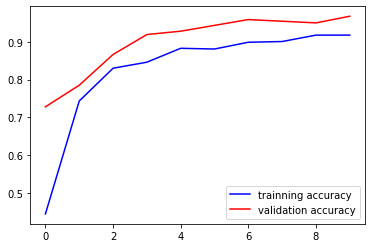

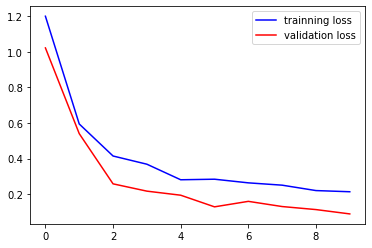

In [74]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [75]:
import cv2
import os
from keras.models import load_model
import numpy as np
from pygame import mixer
import time
model = load_model('Models/cnnCat2_new.h5')

pygame 2.1.0 (SDL 2.0.16, Python 3.7.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [76]:
model.predict(X_test)  

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [87]:
X_test

array([[[[ 32,  66,  89],
         [ 29,  66,  88],
         [ 29,  64,  90],
         ...,
         [ 40,  80, 115],
         [ 40,  80, 115],
         [ 42,  82, 117]],

        [[ 29,  63,  86],
         [ 28,  64,  88],
         [ 29,  65,  90],
         ...,
         [ 39,  79, 114],
         [ 38,  79, 113],
         [ 41,  81, 116]],

        [[ 27,  61,  85],
         [ 29,  64,  88],
         [ 30,  65,  90],
         ...,
         [ 38,  78, 113],
         [ 38,  78, 113],
         [ 40,  80, 115]],

        ...,

        [[ 48,  87, 119],
         [ 49,  88, 120],
         [ 49,  88, 120],
         ...,
         [ 44,  84, 126],
         [ 46,  86, 128],
         [ 48,  88, 130]],

        [[ 47,  86, 118],
         [ 48,  87, 119],
         [ 49,  88, 120],
         ...,
         [ 43,  83, 125],
         [ 45,  85, 127],
         [ 47,  87, 129]],

        [[ 47,  86, 118],
         [ 48,  87, 119],
         [ 49,  88, 120],
         ...,
         [ 43,  83, 125],
        

In [88]:
len(X_test)

456

In [90]:
X_test.shape

(456, 145, 145, 3)

In [91]:
len(model.predict(X_test))

456

In [92]:
model.predict(X_test).shape

(456, 4)

In [93]:
np.argmax(model.predict(X_test), axis=-1)

array([2, 3, 3, 2, 1, 2, 3, 3, 2, 2, 0, 2, 2, 3, 3, 0, 2, 3, 2, 3, 0, 0,
       2, 3, 3, 2, 2, 3, 0, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 1, 2, 2, 2, 0, 2, 0, 1, 3, 3, 3, 0, 0, 0, 2, 3, 2,
       2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 0, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 1, 1, 3, 3, 3, 2, 3, 1, 2, 3, 3, 0, 1, 2, 3, 2, 0, 3, 1, 3,
       2, 2, 3, 2, 3, 1, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 1, 2, 3, 2,
       3, 0, 2, 2, 3, 1, 2, 3, 3, 1, 1, 3, 2, 3, 1, 0, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 1, 2, 3, 3, 3, 3, 2, 3, 1, 2, 2, 3, 3, 3, 2, 1, 3, 3, 1,
       3, 0, 2, 3, 1, 2, 3, 3, 3, 1, 2, 2, 2, 0, 2, 3, 2, 3, 2, 3, 3, 3,
       2, 1, 0, 2, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 1, 2, 1, 3, 2, 3, 2, 2,
       2, 3, 2, 1, 3, 2, 2, 0, 2, 3, 3, 3, 2, 2, 2, 2, 2, 1, 2, 1, 3, 3,
       2, 1, 3, 0, 1, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 1, 3, 3, 3, 2, 2, 1, 3, 2, 2, 0, 2,
       2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 2,

In [94]:
np.argmax(model.predict(X_test), axis=1)

array([2, 3, 3, 2, 1, 2, 3, 3, 2, 2, 0, 2, 2, 3, 3, 0, 2, 3, 2, 3, 0, 0,
       2, 3, 3, 2, 2, 3, 0, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 1, 2, 2, 2, 0, 2, 0, 1, 3, 3, 3, 0, 0, 0, 2, 3, 2,
       2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 0, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 1, 1, 3, 3, 3, 2, 3, 1, 2, 3, 3, 0, 1, 2, 3, 2, 0, 3, 1, 3,
       2, 2, 3, 2, 3, 1, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 1, 2, 3, 2,
       3, 0, 2, 2, 3, 1, 2, 3, 3, 1, 1, 3, 2, 3, 1, 0, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 1, 2, 3, 3, 3, 3, 2, 3, 1, 2, 2, 3, 3, 3, 2, 1, 3, 3, 1,
       3, 0, 2, 3, 1, 2, 3, 3, 3, 1, 2, 2, 2, 0, 2, 3, 2, 3, 2, 3, 3, 3,
       2, 1, 0, 2, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 1, 2, 1, 3, 2, 3, 2, 2,
       2, 3, 2, 1, 3, 2, 2, 0, 2, 3, 3, 3, 2, 2, 2, 2, 2, 1, 2, 1, 3, 3,
       2, 1, 3, 0, 1, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 1, 3, 3, 3, 2, 2, 1, 3, 2, 2, 0, 2,
       2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 2,

In [95]:
np.argmax(model.predict(X_test), axis=0)

array([10,  4,  0,  1], dtype=int64)

In [77]:
#prediction = model.predict_classes(X_test)
prediction = np.argmax(model.predict(X_test), axis=-1)

In [78]:
prediction

array([2, 3, 3, 2, 1, 2, 3, 3, 2, 2, 0, 2, 2, 3, 3, 0, 2, 3, 2, 3, 0, 0,
       2, 3, 3, 2, 2, 3, 0, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 1, 2, 2, 2, 0, 2, 0, 1, 3, 3, 3, 0, 0, 0, 2, 3, 2,
       2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 0, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 1, 1, 3, 3, 3, 2, 3, 1, 2, 3, 3, 0, 1, 2, 3, 2, 0, 3, 1, 3,
       2, 2, 3, 2, 3, 1, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 1, 2, 3, 2,
       3, 0, 2, 2, 3, 1, 2, 3, 3, 1, 1, 3, 2, 3, 1, 0, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 1, 2, 3, 3, 3, 3, 2, 3, 1, 2, 2, 3, 3, 3, 2, 1, 3, 3, 1,
       3, 0, 2, 3, 1, 2, 3, 3, 3, 1, 2, 2, 2, 0, 2, 3, 2, 3, 2, 3, 3, 3,
       2, 1, 0, 2, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 1, 2, 1, 3, 2, 3, 2, 2,
       2, 3, 2, 1, 3, 2, 2, 0, 2, 3, 3, 3, 2, 2, 2, 2, 2, 1, 2, 1, 3, 3,
       2, 1, 3, 0, 1, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 1, 3, 3, 3, 2, 2, 1, 3, 2, 2, 0, 2,
       2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 2,

In [79]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

In [80]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), prediction, target_names=labels_new))

              precision    recall  f1-score   support

        yawn       0.97      0.85      0.90        39
     no_yawn       0.83      0.97      0.90        36
      Closed       0.97      0.99      0.98       181
        Open       0.99      0.96      0.98       200

    accuracy                           0.96       456
   macro avg       0.94      0.94      0.94       456
weighted avg       0.97      0.96      0.97       456



In [81]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145
def prepare(filepath, face_cas="C:\\Users\\hp\\Desktop\\Driver Drowsiness Detection System\\
                    Drowsiness Detection aa\\haar cascade files\\haarcascade_frontalface_alt.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("C:\\Users\\hp\\Desktop\\Driver Drowsiness Detection System\\Drowsiness Detection aa\\Models\\cnnCat2_new.h5")

In [82]:
prediction = model.predict([prepare("C:\\Users\\hp\\Desktop\\Driver Drowsiness Detection System\\
                                        Drowsiness Detection aa\\Dataset\\train\\no_yawn\\141.jpg")])
np.argmax(prediction)

3

In [83]:
prediction = model.predict([prepare("C:\\Users\\hp\\Desktop\\Driver Drowsiness Detection System\\
                                        Drowsiness Detection aa\\Dataset\\train\\yawn\\53.jpg")])
np.argmax(prediction)

2

In [84]:
prediction = model.predict([prepare("C:\\Users\\hp\\Desktop\\Driver Drowsiness Detection System\\
                                            Drowsiness Detection aa\\Dataset\\train\\open\\_53.jpg")])
np.argmax(prediction)

3

In [85]:
prediction = model.predict([prepare("C:\\Users\\hp\\Desktop\\Driver Drowsiness Detection System\\
                                            Drowsiness Detection aa\\Dataset\\train\\closed\\_36.jpg")])
np.argmax(prediction)

2

In [ ]:
import cv2
import os
from keras.models import load_model
import numpy as np
from pygame import mixer
import time

mixer.init()
sound = mixer.Sound('alarm.wav')

face = cv2.CascadeClassifier('haar cascade files\haarcascade_frontalface_alt.xml')
leye = cv2.CascadeClassifier('haar cascade files\haarcascade.xml')
reye = cv2.CascadeClassifier('haar cascade files\haarcascade - Copy.xml')

lbl=['Close','Open','Yawn','No Yawn']
framespersecond = 0
model = load_model('Models/cnnCat2_new.h5')
path = os.getcwd()
cap = cv2.VideoCapture(0)
framespersecond= int(cap.get(cv2.CAP_PROP_FPS))
print("The total number of frames in this video is ", framespersecond)
font = cv2.FONT_HERSHEY_DUPLEX 
count=0
score=0
thicc=2
rpred=[99]
lpred=[99]
fpred=[99]

while(True):
    ret, frame = cap.read()
    height,width = frame.shape[:2] 

    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    #faces = face.detectMultiScale(gray,minNeighbors=5,scaleFactor=1.1,minSize=(25,25))
    faces = face.detectMultiScale(frame,minNeighbors=5,scaleFactor=1.1,minSize=(25,25))
    left_eye = leye.detectMultiScale(frame)
    right_eye =  reye.detectMultiScale(frame)

    cv2.rectangle(frame, (0,height-100) , (155,height) , (0,0,0) , thickness=cv2.FILLED )
    cv2.rectangle(frame, (width-150,0) , (width,50) , (0,0,0) , thickness=cv2.FILLED )

    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y) , (x+w,y+h) , (0,255,0) , 2 )
        face_new = frame[y:y+h,x:x+w]
        count = count+1
        #r_eye = cv2.cvtColor(r_eye,cv2.COLOR_BGR2GRAY)
        face_new = cv2.resize(face_new,(145,145))
        face_new = face_new/255
        #r_eye=  r_eye.reshape(145,145,-1)
        face_new =  face_new.reshape(145,145,-1)
        face_new = np.expand_dims(face_new,axis=0)
        #rpred = model.predict_classes(r_eye)
        fpred = (model.predict(face_new) > 0.5).astype("int32")
        #print(rpred[0][0])
        #if(rpred[0]==1):
        if((fpred[0][0]==1).any()):
            lbl='Yawn' 
        #f(rpred[0]==0):
        if((fpred[0][1]==1).any()):
            lbl='No Yawn'
        break

    for (x,y,w,h) in right_eye:
        cv2.rectangle(frame, (x,y) , (x+w,y+h) , (0,255,0) , 1 )
        r_eye=frame[y:y+h,x:x+w]
        count=count+1
        #r_eye = cv2.cvtColor(r_eye,cv2.COLOR_BGR2GRAY)
        r_eye = cv2.resize(r_eye,(145,145))
        r_eye= r_eye/255
        #r_eye=  r_eye.reshape(145,145,-1)
        r_eye=  r_eye.reshape(145,145,-1)
        r_eye = np.expand_dims(r_eye,axis=0)
        #rpred = model.predict_classes(r_eye)
        rpred = (model.predict(r_eye) > 0.5).astype("int32")
        #print(rpred[0][0])
        #if(rpred[0]==1):
        if((rpred[0][3]==1).any()):
            lbl='Open' 
        #f(rpred[0]==0):
        if((rpred[0][2]==1).any()):
            lbl='Closed'
        break

    for (x,y,w,h) in left_eye:
        cv2.rectangle(frame, (x,y) , (x+w,y+h) , (0,255,0) , 1 )
        l_eye=frame[y:y+h,x:x+w]
        count=count+1
        #l_eye = cv2.cvtColor(l_eye,cv2.COLOR_BGR2GRAY)  
        l_eye = cv2.resize(l_eye,(145,145))
        l_eye = l_eye/255
        l_eye = l_eye.reshape(145,145,-1)
        l_eye = np.expand_dims(l_eye,axis=0)
        #lpred = model.predict_classes(l_eye)
        lpred = np.argmax(model.predict(l_eye), axis=-1)
        lpred = (model.predict(l_eye) > 0.5).astype("int32")
        #print(lpred[0][0])
        #if((lpred[0]==1):
        if((lpred[0][3]==1).any()):
            lbl='Open'   
        if((lpred[0][2]==1).any()):
        #if(lpred[0]==0):
            lbl='Closed'
        break

    if(((rpred[0][2]==1).any()) and ((lpred[0][2]==1).any())):
    #if(rpred[0]==0 and lpred[0]==0):
        score = score + 1
        cv2.putText(frame,"Closed",(10,height-60), font, 1,(255,255,255),1,cv2.LINE_AA)
    # if(rpred[0]==1 or lpred[0]==1):
    elif(((rpred[0][3]==1).any()) and ((lpred[0][3]==1).any())):
        score = score - 1
        cv2.putText(frame,"Open",(10,height-60), font, 1,(255,255,255),1,cv2.LINE_AA) 
    if((fpred[0][0]==1).any()):
        score = score + 1
        cv2.putText(frame,"Yawn",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    #if(rpred[0]==0):
    elif((fpred[0][1]==1).any()):
        score = score - 1
        cv2.putText(frame,"No Yawn",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    
        
    if(score<0):
        score=0   
    cv2.putText(frame,'Score:'+str(score),(width-145,30), font, 1,(255,255,255),1,cv2.LINE_AA)
    if(score>2):
        #person is feeling sleepy so we beep the alarm
        cv2.imwrite(os.path.join(path,'image.jpg'),frame)
        try:
            sound.play()
            
        except:  # isplaying = False
            pass
        if(thicc<8):
            thicc= thicc+2
        else:
            thicc=thicc-2
            if(thicc<2):
                thicc=2
        cv2.rectangle(frame,(0,0),(width,height),(0,0,255),thicc) 
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

pygame 2.1.0 (SDL 2.0.16, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html
The total number of frames in this video is  30


In [98]:
lpred[0]

array([0, 1, 0, 0])

In [99]:
rpred[0]

array([0, 1, 0, 0])

In [100]:
fpred[0]

array([0, 1, 0, 0])

In [101]:
fpred[0][0]

0

In [102]:
fpred

array([[0, 1, 0, 0]])

In [103]:
rpred

array([[0, 1, 0, 0]])